In [29]:
using JLD
using PyPlot
using Statistics, StatsBase #mean and std

In [2]:
nombrecm="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-CM.jld"
archivo=load(nombrecm)
DatosCMP=archivo["CMP"]
DatosCMN=archivo["CMN"];
evocada=false
nmax=length(DatosCMP) #cuantos cuadros hay

2000

In [3]:
DatosCMP[1337]

83×3 Array{Float64,2}:
 56.6458    7.36196   17.6792
 51.1547    2.95859   35.0012
 31.8368   23.8453    32.9296
 63.0976   56.9914    38.6804
 56.6326   50.6631    76.7433
  5.40743  34.117     49.3687
 26.3859   29.8833    40.1037
 54.5827   27.6771    41.2686
 42.5711    9.18131   47.2493
 38.1718   22.2212    21.6175
 53.9741   38.7809    15.9524
  3.78011  58.7839    15.5167
 25.2995   56.1111   216.564 
  ⋮                          
 18.3771   58.4491    33.3549
 45.5718   18.3869    58.2111
  9.9672   40.1501    39.4087
 38.8371   32.2749    36.4274
 40.2815   18.759     22.4502
 39.5743   63.1783   399.349 
  3.87119  48.7651    55.9999
 24.3479   24.1827    53.0432
  2.412    10.5233    33.0711
 49.1141   50.6049    37.0693
 63.6691   49.7238    20.0149
 50.5328   34.7027    36.9648

In [4]:
DatosCMP[1341]

91×3 Array{Float64,2}:
 16.9233   30.6356    49.8932
 14.2005   62.0       27.4387
 44.9154   15.8225    24.0242
 19.306     5.74008   26.0908
 41.3845   12.6281    55.6523
 37.5174   63.2014   233.159 
 11.2154   22.9842    30.8148
 12.3875   50.3651    54.1826
 33.8663    3.97144   95.0296
 20.9743   62.541     21.9201
 10.4353   12.408     52.9457
 10.7588   53.2344    31.5709
 31.2726   47.6283    74.2546
  ⋮                          
 61.9817   19.1807    19.7678
  9.52775  61.5209    29.2413
 60.756    28.7404    23.3925
 19.3017   13.7233    61.8143
 19.3663   19.0293    55.6596
 13.801     4.38367  129.27  
 31.7663   28.0747    26.6813
  3.64829  25.5845    24.4496
 22.0748   47.7652    79.9095
 35.4152   16.7306    30.4561
 16.238    45.361     54.1227
 41.4803   53.0049   392.106 

In [5]:
function leeunmegaarrayarchivos(NomineGeneralis::AbstractString, desde=35, hasta=501)
    LeMegaArray=Array[]
    for t=desde:hasta
      #  println("$NomineGeneralis-$t.dat")
        CMx=try 
            readdlm("$NomineGeneralis-$t.dat")
        catch
            []
        end
        push!(LeMegaArray, CMx)
    end
    return LeMegaArray
    end


function leunjlddeCM(datos, desde=1, hasta=300)
    LeMegaArray=Array[]
    for t=desde:hasta
      #  println("$NomineGeneralis-$t.dat")
        CMx=try 
        readdlm("$NomineGeneralis-$t.dat")
        catch
            []
        end
        push!(LeMegaArray, CMx)
    end
    return LeMegaArray
end



leunjlddeCM (generic function with 3 methods)

Para Evocados, hay un par de variables temporales para considerar:
- retrazo: el tiempo en cuadros que hubo desde el comienzo del registro hasta el estimulo
- latencia: el tiempo en cuadros que hubo desde el estimulo hasta que paso algo interesante


In [6]:
freq=7.022 # la frecuencia de muestreo en kHz de los experimentos viejos

if evocada
    retms=5.0 #retrazo en milisec
    latms=4.0 #latencia en milisec
    retrazo=round(Int, retms * freq)
    lat=round(Int, latms * freq)
    desde=retrazo+lat
    hasta=300
else
    retms=0
    latms=0
    retrazo=0
    lat=0
    desde=1
    hasta=nmax
end

2000

In [7]:
function dist2D(x,y)
    result=sqrt((x[1]-y[1])^2+(x[2]-y[2])^2)
    return result
end

function difgordis(x,y)
    result=abs(x-y)/max(abs(x),abs(y))
    return result
end

difgordis (generic function with 1 method)

In [8]:
difgordis(0.21,0.29)

0.27586206896551724

In [9]:
function encuentraTrayectorias(Datos, mincadena=20, mingordo=2.0, desde=1,hasta=20)

toleradist=16.0*sqrt(2)
#toldifgordis=0.33
tau=1
t=1
j=1

Catenario=Dict{Integer, Array{Any}}()
Cadena=[0 0 0 0]
tnum=1
CopiaMegaArray=deepcopy(Datos);
NumFrames=length(Datos)
FakeNumFrames=NumFrames



while t <= FakeNumFrames-1 
    
    tau=t
    
    @label arrrrh
 
        if(CopiaMegaArray[tau]==[])
            
            jmax,nada=0,0
        else
          
     jmax,nada= size(CopiaMegaArray[tau])
        end
    
        
    while j <=jmax && tau<FakeNumFrames
            
            if abs(CopiaMegaArray[tau][j,3]) > mingordo
                
            Eslabon=[transpose(CopiaMegaArray[tau][j,:]) tau]
            Cadena=vcat(Cadena, Eslabon)
         #   println("Papa t: ", t, "  tau: ", tau, " y  j: ",j )
            mindist=2
            kasterisco=1
                
                if CopiaMegaArray[tau+1]==[]
                    kmax,nada=0,0
                else
                kmax, nada= size(CopiaMegaArray[tau+1])
                end
                huboalgo=false
          
        #    kmax=5
            
            for k=1:kmax
                
                EslabonTentativo=CopiaMegaArray[tau+1][k,:]
            #    println(EslabonTentativo)
                    if abs(EslabonTentativo[3])>mingordo
                    dist=dist2D(Eslabon,EslabonTentativo)                  
                    if dist<mindist
                        mindist=dist
                        kasterisco=k
                        
                       # println(kasterisco, "=k*", k, "=k")
                        huboalgo=true
                    end
                end
            
            end    
            
            if huboalgo && mindist<toleradist
                #quitamos el anterior
                CopiaMegaArray[tau][j,3]=0.0000 
               # println(mindist," ", t, " ", tau+1 ," ", kasterisco )
                
                if tau+1<FakeNumFrames
                    tau+=1
                    j=kasterisco
      #              println("Pepe t: ", t, "  tau: ", tau, " y  j: ",j )
                    @goto arrrrh
                
                else
                    
                    Eslabon=[transpose(CopiaMegaArray[tau+1][kasterisco,:]) tau+1]
                    Cadena=vcat(Cadena, Eslabon)
      #              println("Pipi t: ", t, "  t: ", t, " y  j: ",j )
                    j+=1
                    tau=t
                    
                    if size(Cadena)[1]>mincadena
                        #push!(Catenario, Cadena[2:end,:])
                        Catenario[tnum]=Cadena[2:end,:]
                        tnum+=1
                    end
                    
                    Cadena=[0 0 0 0]
                    @goto arrrrh
                end
                                
            else
                
                if size(Cadena)[1]>mincadena
                    # veamos si funciona  mejor como dict 
                        #push!(Catenario, Cadena[2:end,:])
                        Catenario[tnum]=Cadena[2:end,:]
                        tnum+=1
                end
                Cadena=[0 0 0 0]
                j+=1
                tau=t
                @goto arrrrh
            end
                       
        end #cierra sobre el if de  la masa 
                
        j+=1                    
        tau=t
    
    end
    @label urrr
      
    j=1
    t+=1
    tau=t
    Cadena=[0 0 0 0]
        end 
    
    return Catenario
end

encuentraTrayectorias (generic function with 5 methods)

In [10]:
(desde, hasta)


(1, 2000)

In [51]:
pesomin=100
longmin=3

3

In [52]:
#Recuerda el segundo argumento es la longitud mínima de la cadena
@time CatenarioPositivo=encuentraTrayectorias(DatosCMP,longmin,pesomin,desde,hasta);


  1.118770 seconds (5.65 M allocations: 205.365 MiB, 15.16% gc time)


In [53]:
CatenarioNegativo=encuentraTrayectorias(DatosCMN,longmin,pesomin,desde,hasta);

In [54]:
nombreout=nombrecm[1:end-6]*"Tray-todas.jld"
nota="longitud minima fue $longmin, peso minimo fue $pesomin "
#save(nombreout, "CatenarioNegativo", CatenarioNegativo, "CatenarioPositivo", CatenarioPositivo, "nota", nota)

"longitud minima fue 3, peso minimo fue 100 "

In [55]:
length(CatenarioPositivo), length(CatenarioNegativo)

(1088, 1347)

In [43]:
CatenarioPositivo

Dict{Integer,Array{Any,N} where N} with 166 entries:
  11  => Any[35.9454 57.8476 214.565 534.0; 36.1699 58.4521 257.803 535.0; … ; …
  134 => Any[41.5176 50.4972 1170.48 1200.0; 41.6335 50.3013 1101.1 1201.0; … ;…
  158 => Any[37.4513 62.2027 501.646 1328.0; 36.1354 61.9943 478.874 1329.0; … …
  160 => Any[39.0025 52.3616 437.117 1351.0; 37.3114 52.9949 198.149 1352.0; … …
  29  => Any[36.1255 57.4174 5266.53 633.0; 34.8901 56.1003 6802.8 634.0; … ; 3…
  131 => Any[54.4943 25.5411 375.758 1186.0; 54.3748 25.359 370.706 1187.0; … ;…
  74  => Any[36.2205 52.8651 1582.17 887.0; 36.2159 52.6775 1660.63 888.0; … ; …
  57  => Any[36.5629 56.3793 3185.26 817.0; 36.2737 55.9961 3140.31 818.0; … ; …
  31  => Any[16.7556 54.3863 150.993 647.0; 16.7804 54.1836 170.17 648.0; … ; 1…
  70  => Any[12.0431 3.69078 100.431 879.0; 11.4521 3.57042 117.707 880.0; … ; …
  33  => Any[63.6188 46.1729 128.343 658.0; 63.6384 45.2838 129.22 659.0; … ; 6…
  114 => Any[28.9222 54.9147 3650.22 1114.0; 28.9224 54.

In [25]:
nombreout

"/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_prepro-Tray-todas.jld"

In [26]:
values(CatenarioNegativo)

Base.ValueIterator for a Dict{Integer,Array{Any,N} where N} with 2682 entries. Values:
  Any[24.8117 62.3188 -57.025 1218.0; 24.4162 62.1475 -77.1675 1219.0; … ; 24.5…
  Any[48.2808 44.6256 -57.6653 1252.0; 48.4204 44.7605 -67.4088 1253.0; … ; 46.…
  Any[61.1674 33.0129 -50.4245 368.0; 60.6643 32.9651 -66.0711 369.0; 60.2865 3…
  Any[32.8284 30.8241 -64.8505 1003.0; 32.7313 30.5057 -73.5955 1004.0; 33.3042…
  Any[11.4745 14.5024 -263.474 865.0; 12.6406 14.6794 -241.043 866.0; … ; 9.084…
  Any[40.5159 24.7688 -93.9305 1487.0; 40.3952 24.8873 -115.25 1488.0; 39.5046 …
  Any[48.0764 62.5689 -414.616 1015.0; 49.5534 63.5823 -200.843 1016.0; … ; 49.…
  Any[45.5011 12.7884 -100.389 38.0; 43.7532 13.2642 -150.451 39.0; 44.5142 13.…
  Any[36.5047 29.773 -59.2007 1730.0; 36.5182 29.6831 -54.975 1731.0; … ; 39.36…
  Any[36.6784 31.8388 -62.8676 1201.0; 36.5661 31.694 -66.8679 1202.0; … ; 36.9…
  Any[17.4284 17.7724 -70.2062 885.0; 17.7603 17.9846 -116.813 886.0; … ; 19.93…
  Any[27.2282 13.004 -

In [57]:
save(nombreout, "CatenarioPositivo", CatenarioPositivo, "CatenarioNegativo", CatenarioNegativo, "notatray", nota)

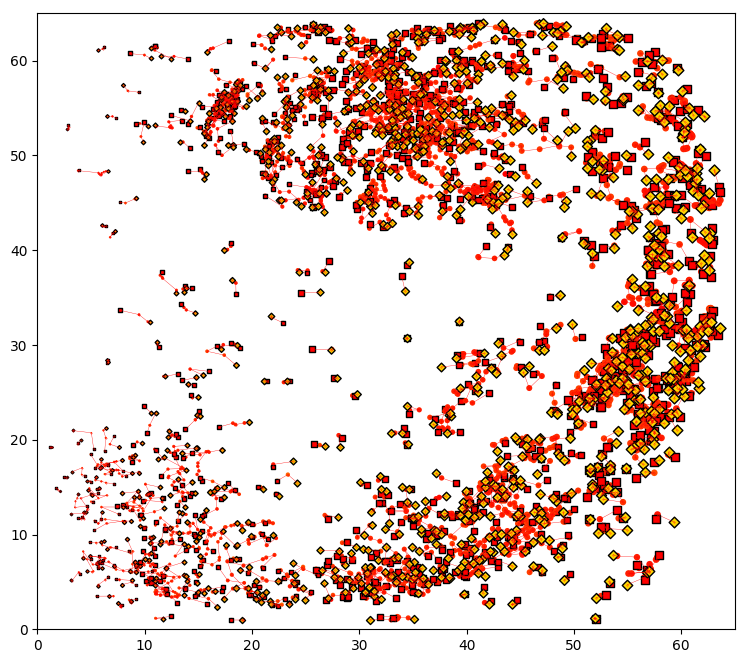

In [56]:
#PyPlot.ion()
figure(figsize=(9,8))
#axis("equal")
xlim(0.0,65.0)
ylim(0.0,65.0)
tolerancia=0
minlong=0
maxlong=20000
#colores=Union{}

for p in values(CatenarioPositivo)
    gordura=abs(p[:3])
    longus,gordus=size(p)
    if (mean(gordura)>tolerancia) && (longus>minlong) && longus < maxlong
        #Si son chiquitos no nos interesan.
        xxpos=p[:,1]
        yypos=p[:,2]    
        tiempos=p[:,4]/7022    
        plot(xxpos, yypos, marker="o", markersize=0.25, color="r", lw=0.25, zorder=15)
        colores=scatter(xxpos,yypos, s=gordura*0.4, edgecolors="none", 
        c=tiempos, cmap="autumn", vmin=0.0, vmax=0.72 )
        principios=scatter(xxpos[1],yypos[1], s=gordura*0.5,
        edgecolors="black", 
        color="r", marker="s", label="Inicio" ,
        zorder=1)
        finales=scatter(xxpos[end],yypos[end], s=gordura*0.5, edgecolors="black", 
        color="gold", marker="D", label="Final", zorder=2 )
        # annotate(round(tiempos[1],4),  (xxpos[1], yypos[1]), fontsize=7, color="black")
        # annotate(round(tiempos[end],4), (xxpos[end], yypos[end]), fontsize=7, color="green")

    end
end

#savefig("ejemploaltaspositivas-01.svg",dpi=92)

In [31]:
JLD.save

save (generic function with 8 methods)

In [36]:
save(nombreout, "CatenarioPositivo", CatenarioPositivo, "CatenarioNegativo", CatenarioNegativo, "notatray", nota)